### Bee Communication

Visulations and analysis of evolutionary simulations.

In [48]:
# Imports

import matplotlib.pyplot as plt
from matplotlib import colormaps
import numpy as np
import pandas as pd

# load in the results
result_dir = "/Users/katiepambakian/Documents/BSc Computer Science/Y3/Dissertation/BeeCommunication/results/"

## Overall Evolution (fitness vs generation)

x-axis: generation number

y-axis: best fitness

[[0.267004 0.004874 0.329415 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]


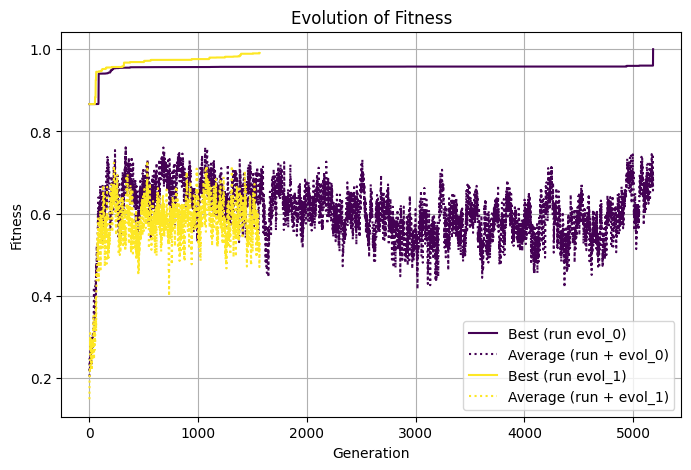

In [49]:
num_runs = 2

plt.figure(figsize=(8,5))

colors = plt.cm.viridis(np.linspace(0, 1, num_runs))
print(colors)

for i in range(0,num_runs):
    overall_evolution_dir = result_dir + "evol_" + str(i) + ".dat"

    # pass the input
    df = pd.read_csv(
        overall_evolution_dir,
        sep=r"\s+",
        header=None,
        names=["generation", "best_fitness", "avg_fitness"]
    )

    generation = df["generation"].to_numpy()
    best = df["best_fitness"].to_numpy()
    average = df["avg_fitness"].to_numpy()

    label_name = "evol_"+str(i)

    plt.plot(generation, best, 
             linestyle="-", 
             label="Best (run "+label_name+")",
             color=colors[i],
        )

    plt.plot(generation, average, 
             linestyle=":", 
             label="Average (run + "+label_name+")",
             color=colors[i],
        )

plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Evolution of Fitness")
plt.legend()
plt.grid(True)

plt.show()
    

## Distance of Signaller from the Origin

Distance time graph. 

In [50]:
# Read first line function
def read_first_line(filename):
    # read the input file
    with open(filename, "r") as file:
        return file.readline().strip().split()

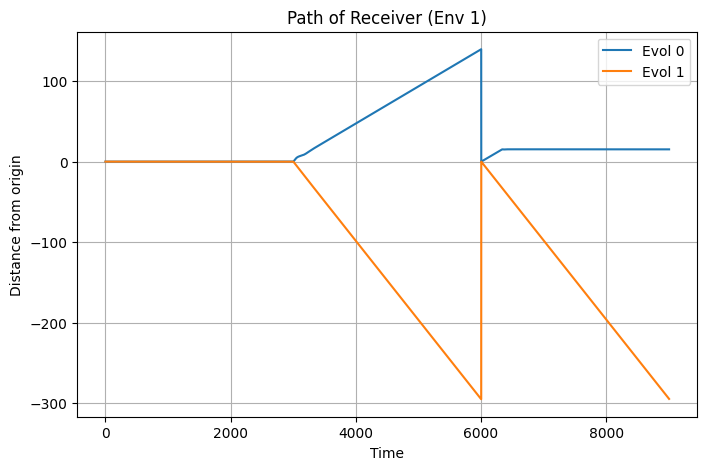

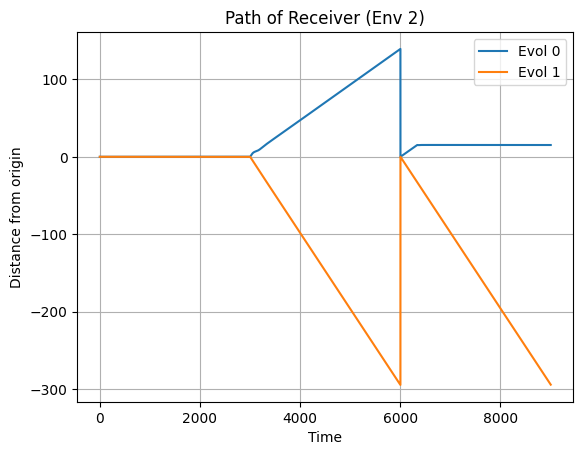

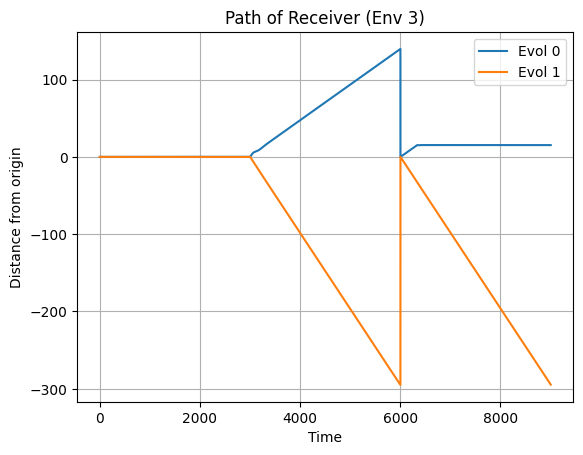

In [61]:
envs = [1,2,3]
phases = [1,2,3]
evols = [0,1]

plt.figure(figsize=(8,5))

for env in envs:
    for evol in evols:
        receiver_phase1 = result_dir + f"behavior_Receiver_{evol}_Env{env}_Phase1.dat"
        receiver_phase2 = result_dir + f"behavior_Receiver_{evol}_Env{env}_Phase2.dat"
        receiver_phase3 = result_dir + f"behavior_Receiver_{evol}_Env{env}_Phase3.dat"

        files = [receiver_phase1, receiver_phase2, receiver_phase3]
            
        combined = []
        for fname in files:
            combined.extend(read_first_line(fname))

        # combine the files to make the y axis
        y_receiver = [float(x) for x in combined]

        # generate the x axis
        x_receiver = range(0, len(combined))

        plt.plot(x_receiver, y_receiver, label=f"Evol {evol}")


    plt.xlabel("Time")
    plt.ylabel("Distance from origin")
    plt.title(f"Path of Receiver (Env {env})")
    plt.grid(True)
    plt.legend()
    plt.show()


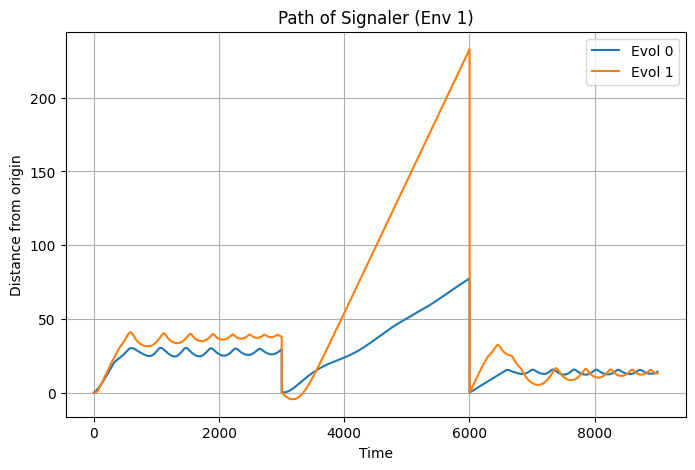

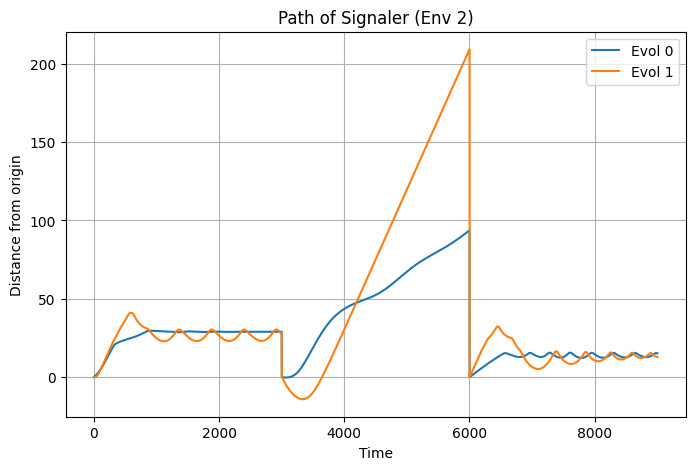

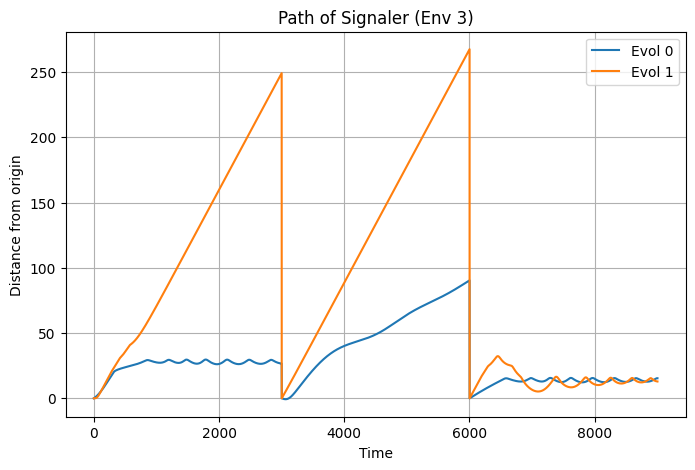

In [60]:
envs = [1,2,3]
phases = [1,2,3]
evols = [0,1]


for env in envs:
    plt.figure(figsize=(8,5))

    for evol in evols:
        signaller_phase1 = result_dir + f"behavior_Signaler_{evol}_Env{env}_Phase1.dat"
        signaller_phase2 = result_dir + f"behavior_Signaler_{evol}_Env{env}_Phase2.dat"
        signaller_phase3 = result_dir + f"behavior_Signaler_{evol}_Env{env}_Phase3.dat"

        files = [signaller_phase1, signaller_phase2, signaller_phase3]
        
        combined = []
        for fname in files:
            combined.extend(read_first_line(fname))

        # combine the files to make the y axis
        y_signaller = [float(x) for x in combined]

        # generate the x axis
        x_signaller = range(0, len(combined))

        # plot it

        plt.plot(x_signaller, y_signaller, label=f"Evol {evol}")

    plt.xlabel("Time")
    plt.ylabel("Distance from origin")
    plt.title(f"Path of Signaler (Env {env})")
    plt.legend()
    plt.grid(True)

    plt.show()


## Behavior of the Signaller and Receiver together

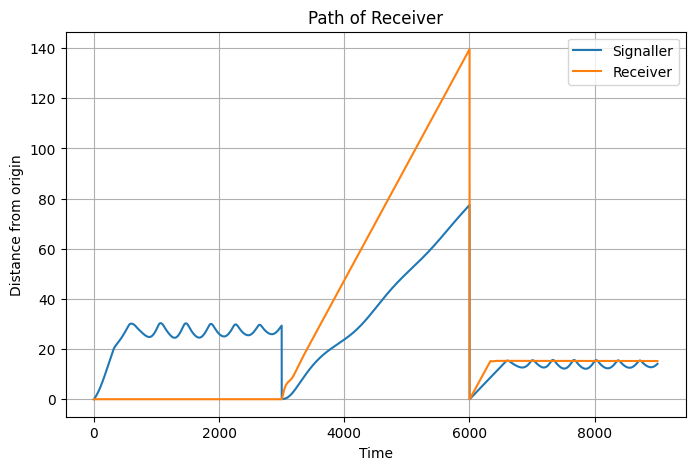

In [ ]:
plt.figure(figsize=(8,5))

plt.plot(x_signaller, y_signaller, label="Signaller")
plt.plot(x_receiver, y_receiver, label="Receiver")

plt.xlabel("Time")
plt.ylabel("Distance from origin")
plt.title("Path of Receiver and Signaller")
plt.legend()
plt.grid(True)

plt.show()